### Importing Libraries

In [266]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
methods = [Ridge, Lasso, ElasticNet, LinearRegression, DecisionTreeRegressor, RandomForestRegressor, SVR, GradientBoostingRegressor, AdaBoostRegressor]

### Get Date and Datetime values

In [2]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
stock = "^BVSP"

### Collecting data from Yahoo API, for X we take data until yesterday, for y we take X+1 day Adj Close values

In [146]:
Xstock = data.DataReader(stock, 'yahoo', end=yesterday)
ystock = data.DataReader(stock, 'yahoo')
Xstock = Xstock.reset_index()
Xstock.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1228,2021-04-05,117668.0,115262.0,115262.0,117518.0,7245100.0,117518.0
1229,2021-04-06,118213.0,117176.0,117519.0,117499.0,6800800.0,117499.0
1230,2021-04-07,118303.0,116748.0,117499.0,117624.0,0.0,117624.0
1231,2021-04-08,118850.0,117486.0,117624.0,118313.0,8778200.0,118313.0
1232,2021-04-09,118643.0,117336.0,118313.0,117670.0,7739400.0,117670.0


In [148]:
Xstock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1233 non-null   datetime64[ns]
 1   High       1233 non-null   float64       
 2   Low        1233 non-null   float64       
 3   Open       1233 non-null   float64       
 4   Close      1233 non-null   float64       
 5   Volume     1233 non-null   float64       
 6   Adj Close  1233 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 67.6 KB


In [150]:
Xstock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03,1233.000000
mean,85117.134631,83463.832117,84267.257097,84324.652879,5.275114e+06,84324.652879
std,19486.198859,19203.816262,19350.236209,19359.680253,3.080425e+06,19359.680253
min,49057.000000,48067.000000,48468.000000,48472.000000,0.000000e+00,48472.000000
25%,67094.000000,65860.000000,66504.000000,66662.000000,3.283200e+06,66662.000000
50%,84956.000000,83178.000000,84040.000000,84084.000000,4.152200e+06,84084.000000
75%,101240.000000,99373.000000,100262.000000,100275.000000,6.315600e+06,100275.000000
max,125324.000000,123227.000000,125075.000000,125077.000000,2.176870e+07,125077.000000


### Searching for outliers

<AxesSubplot:ylabel='High'>

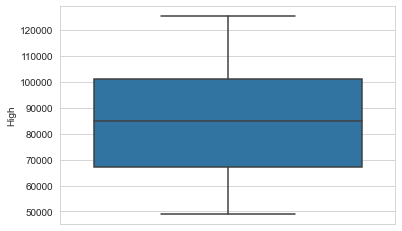

In [155]:
sns.boxplot(y=Xstock['High'])

<AxesSubplot:ylabel='Low'>

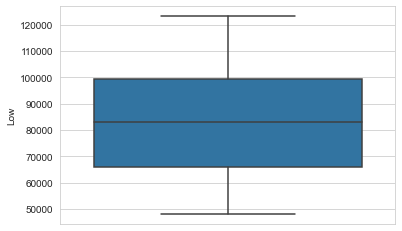

In [156]:
sns.boxplot(y=Xstock['Low'])

<AxesSubplot:ylabel='Open'>

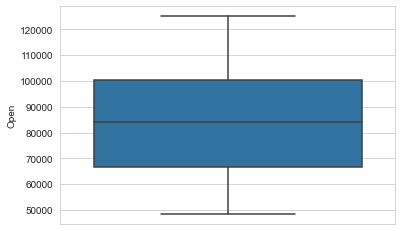

In [157]:
sns.boxplot(y=Xstock['Open'])

<AxesSubplot:ylabel='Close'>

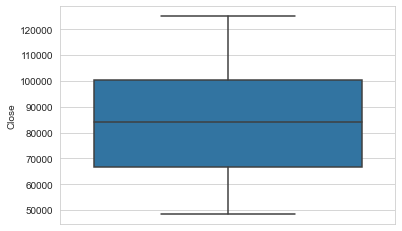

In [158]:
sns.boxplot(y=Xstock['Close'])

<AxesSubplot:ylabel='Volume'>

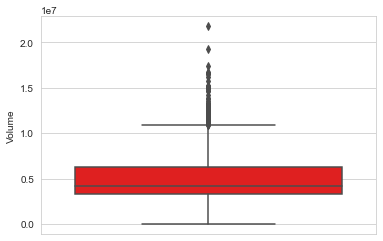

In [160]:
sns.boxplot(y=Xstock['Volume'], color='red')

<AxesSubplot:ylabel='Adj Close'>

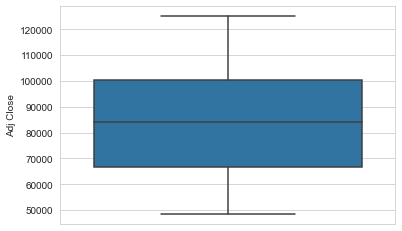

In [161]:
sns.boxplot(y=Xstock['Adj Close'])

### Correlation in the data

<AxesSubplot:>

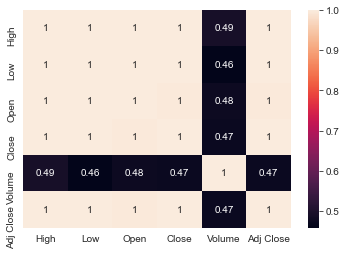

In [162]:
sns.heatmap(Xstock.corr(), annot=True)

### We will not use Volume because it has a lot of outliers and less correlation with our target

#### Divide data between testing and training

In [5]:
X = Xstock.drop(['Date', 'Volume'], axis=1)
y = ystock['Adj Close'].values
y = y.reshape(-1, 1)
y = y[1:]
y

array([[ 52411.       ],
       [ 53228.       ],
       [ 52894.       ],
       ...,
       [118313.       ],
       [117670.       ],
       [118811.7421875]])

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Applying Multi Layer Perceptron Regression Model (Neural Network)


In [225]:
model = MLPRegressor(hidden_layer_sizes=(4,4,4), max_iter=2000, tol=1e-8, learning_rate='adaptive' )

In [226]:
model.fit(X_train, y_train)

c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPRegressor(hidden_layer_sizes=(4, 4, 4), learning_rate='adaptive',
             max_iter=2000, tol=1e-08)

In [227]:
model.score(X,y)

0.9909633644073863

In [228]:
model.predict(X[-1:])

array([118311.69243163])

In [229]:
priceYesterday = X[-1:]['Adj Close'].values
pricePredicted = model.predict(X[-1:])
priceRealToday = ystock[-1:]['Adj Close'].values

In [230]:
print("Price Yesterday: ", priceYesterday, "Price Predicted: ", pricePredicted, "Real Price Today: ", priceRealToday)
print("Price Predicted var %: ", ((pricePredicted-priceYesterday)/priceYesterday)*100)
print("Price Today var %: ", ((priceRealToday-priceYesterday)/priceYesterday)*100)

Price Yesterday:  [117670.] Price Predicted:  [118311.69243163] Real Price Today:  [118811.7421875]
Price Predicted var %:  [0.54533223]
Price Today var %:  [0.97029165]


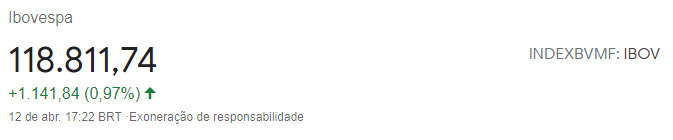

## The model worked as a forecast of IBOV Index on April 12, 2021.

In [231]:
predict = model.predict(X_test)

### Metrics Evaluation

In [233]:
R2 = r2_score(y_test, predict)
MAE = mean_absolute_error(y_test, predict)
MSE = mean_squared_error(y_test, predict, squared=False)
RMSE= mean_squared_error(y_test, predict, squared=True)
print("R2: ", R2)
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE, '\n')
print("Model Score in train data: ", model.score(X_train, y_train))
print("Model Score in test data: ", model.score(X_test, y_test))

R2:  0.9925289024351514
MAE:  1255.7835390311752
MSE:  1676.1261564596953
RMSE:  2809398.8923683506 

Model Score in train data:  0.9901800237237196
Model Score in test data:  0.9925289024351514


### Cross Validation

In [236]:
cross_val_score(model, X, y, cv=5)

c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was

array([0.97775152, 0.98629701, 0.94770681, 0.96011249, 0.98189215])

### Distribuition - Residual

c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

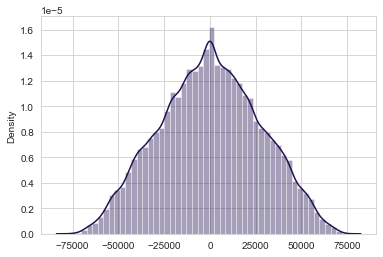

In [235]:
sns.distplot((y_test-predict),bins=50)

### Other Regression Models

In [273]:
Scores = {}
TodayValues = {}
for method in methods:
    if method == SVR:
        method = SVR(kernel='linear')
    else:
        method = method()
    method.fit(X_train, y_train)
    Scores[method] = method.score(X_test, y_test)
    TodayValues[method] = method.predict(X[-1:])

c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 907008435.9030693, tolerance: 30867453.23223935
  positive)
c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 907139624.4878469, tolerance: 30867453.23223935
  positive)
c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d a

In [276]:
Scores[MLPRegressor] = model.score(X_test,y_test)
Scores

{Ridge(): 0.9950554133840769,
 Lasso(): 0.9950598274826292,
 ElasticNet(): 0.9950598277100752,
 LinearRegression(): 0.995055413383503,
 DecisionTreeRegressor(): 0.991499891753641,
 RandomForestRegressor(): 0.9943457769741545,
 SVR(kernel='linear'): 0.9948468947620572,
 GradientBoostingRegressor(): 0.9946883992014286,
 AdaBoostRegressor(): 0.9852383889803709,
 sklearn.neural_network._multilayer_perceptron.MLPRegressor: 0.9925289024351514}

In [277]:
TodayValues[MLPRegressor] = pricePredicted
TodayValues

{Ridge(): array([[117610.79685082]]),
 Lasso(): array([117613.728907]),
 ElasticNet(): array([117613.72906501]),
 LinearRegression(): array([[117610.79685053]]),
 DecisionTreeRegressor(): array([116016.]),
 RandomForestRegressor(): array([116444.14]),
 SVR(kernel='linear'): array([117744.00138208]),
 GradientBoostingRegressor(): array([116936.64073897]),
 AdaBoostRegressor(): array([117650.82]),
 sklearn.neural_network._multilayer_perceptron.MLPRegressor: array([118311.69243163])}

Neural Networks still has the better results for today values

c:\users\aheng\pycharmprojects\kaggleprojects\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Adj Close'>

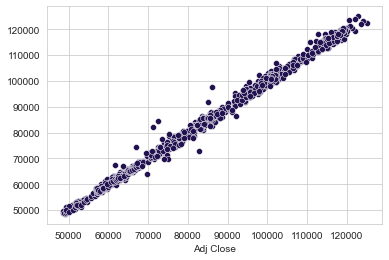

In [298]:
sns.scatterplot(X['Adj Close'], model.predict(X), )